In [ ]:
from transformers import AutoformerForPrediction, AutoformerConfig
import torch

import matplotlib.pyplot as plt

config = AutoformerConfig.from_json_file('multivariate_config.json')
model = AutoformerForPrediction(config)
model.load_state_dict(torch.load('multivariate_model.pth'))
model.eval()

AutoformerForPrediction(
  (model): AutoformerModel(
    (scaler): AutoformerMeanScaler()
    (encoder): AutoformerEncoder(
      (value_embedding): AutoformerValueEmbedding(
        (value_projection): Linear(in_features=227, out_features=16, bias=False)
      )
      (embed_positions): AutoformerSinusoidalPositionalEmbedding(425, 16)
      (layers): ModuleList(
        (0-1): 2 x AutoformerEncoderLayer(
          (self_attn): AutoformerAttention(
            (k_proj): Linear(in_features=16, out_features=16, bias=True)
            (v_proj): Linear(in_features=16, out_features=16, bias=True)
            (q_proj): Linear(in_features=16, out_features=16, bias=True)
            (out_proj): Linear(in_features=16, out_features=16, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=16, out_features=32, bias=True)
          (fc2): Linear(in_features=32, ou

In [12]:
from multivariate import UniDataset
import data

in_days = 4
out_days = 14
batch_size = 32

val_df = data.load(years=['2022'])
val_dataset = UniDataset(val_df, in_days=in_days, out_days=out_days)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 1/1 [00:00<00:00, 1000.31it/s]


In [13]:
for batch_idx, (data, data_time, data_mask, target, target_time) in enumerate(val_loader) :
    outputs = model.generate(
        past_values=data,
        past_time_features=data_time,
        past_observed_mask=data_mask,
        future_time_features=target_time
    )

    pred = outputs.sequences.mean(dim=1)
    break

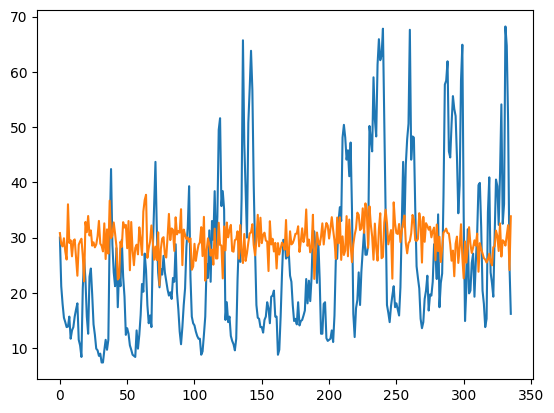

In [15]:
plt.plot(target[2,:,0])
plt.plot(  pred[2,:,0])

In [14]:
(target[:,:,0] - pred[:,:,0]).square().mean().sqrt()

tensor(16.5456)

In [9]:
data.shape

torch.Size([32, 96, 25])

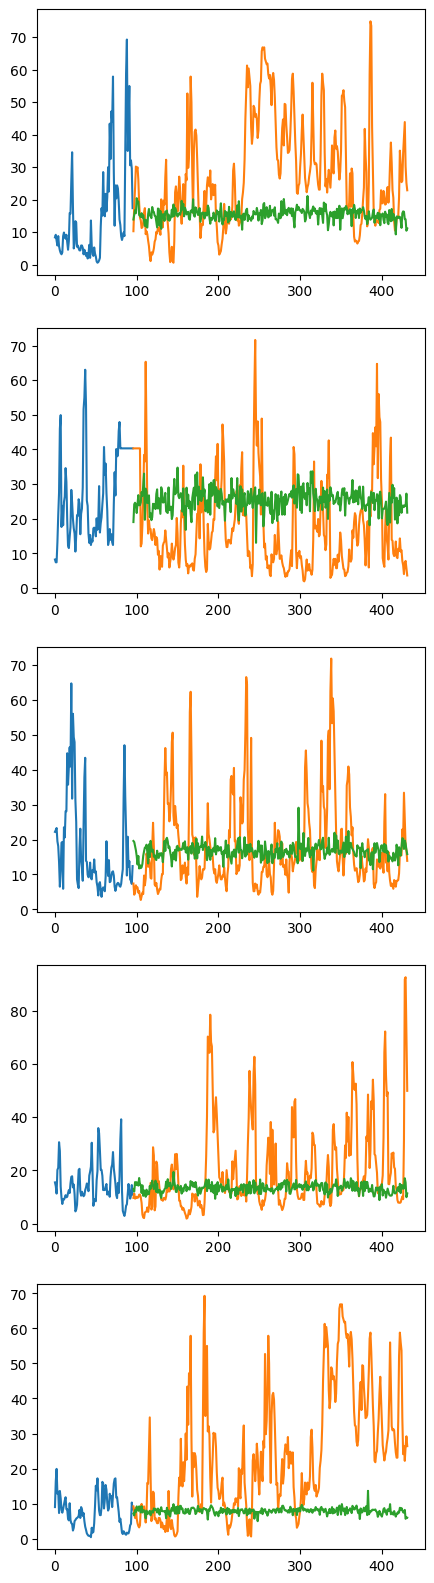

In [10]:
n = 5
fig, ax = plt.subplots(n, 1, figsize=(5,20))

for i in range(n):
    ax[i].plot(data[i,:,0])
    ax[i].plot(torch.arange(target.shape[1]) + data.shape[1], target[i,:,0])
    ax[i].plot(torch.arange(target.shape[1]) + data.shape[1], pred[i,:,0])